In [14]:
import numpy as np
from skimage.io import imread, imshow
import matplotlib.pyplot as plt

<class 'numpy.ndarray'>


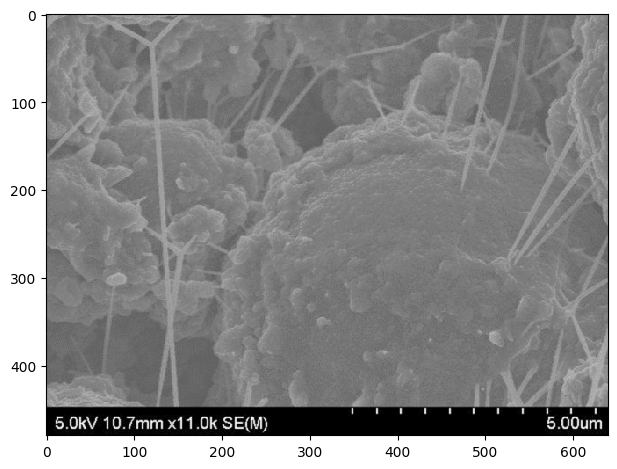

In [17]:
infilename = "sample.jpg"

img_ = imread(infilename)
print(type(img_))
imshow(img_)

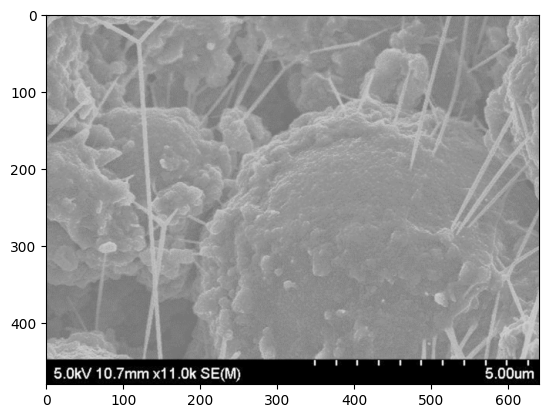

In [18]:
plt.imshow(img_, cmap="Greys_r")
plt.savefig("118_autocontrast_6.png")

In [20]:
img_.shape

(480, 640)

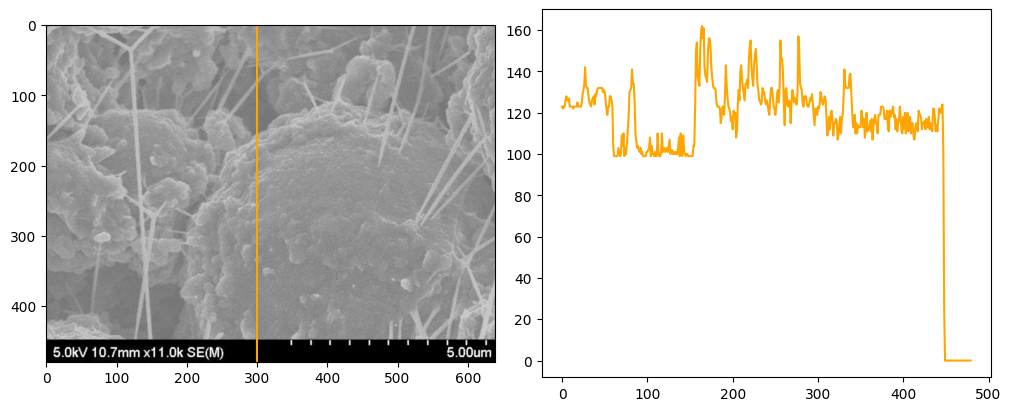

In [28]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 4), constrained_layout=True)

axs[0].imshow(img_, cmap="Greys_r")   # 왼쪽 Axes에 Image 출력

# x = 300을 추출해서 오른쪽 Axes에 line profile 출력, 왼쪽에 선 표시
x = 300
axs[1].plot(img_[:, x], c="orange")   # 오른쪽 Axes에 line profile 출력
axs[0].axvline(x, c="orange")         # 왼쪽 image 위에 해당 line 출력   

fig.savefig("118_autocontrast_7.png")

In [30]:
img_[-50:, x]

array([118, 112, 115, 113, 111, 122, 122, 118, 111, 114, 111, 116, 122,
       120, 120, 123, 124, 101,  25,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=uint8)

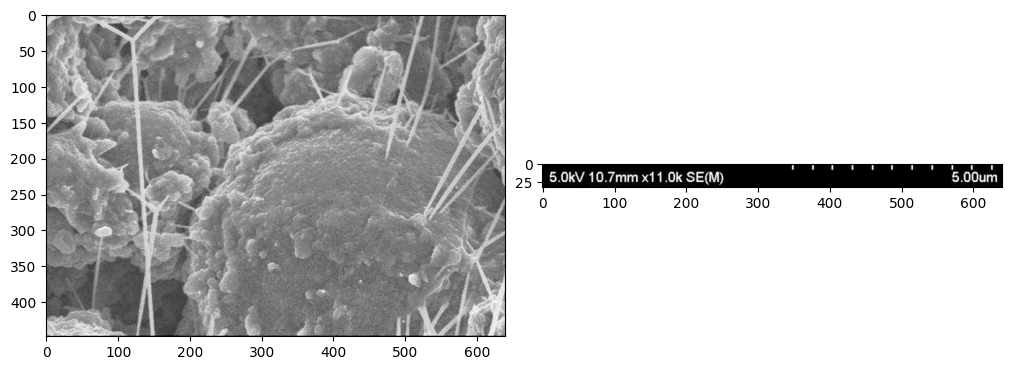

In [45]:
h, w = img_.shape

imgfrac = 14/15
img = img_[:int(h*imgfrac), :]
desc = img_[int(h*imgfrac):, :]

fig, axs = plt.subplots(ncols=2, figsize=(10, 4), constrained_layout=True)
axs[0].imshow(img, cmap="Greys_r")
axs[1].imshow(desc, cmap="Greys_r")

fig.savefig("118_autocontrast_8.png")

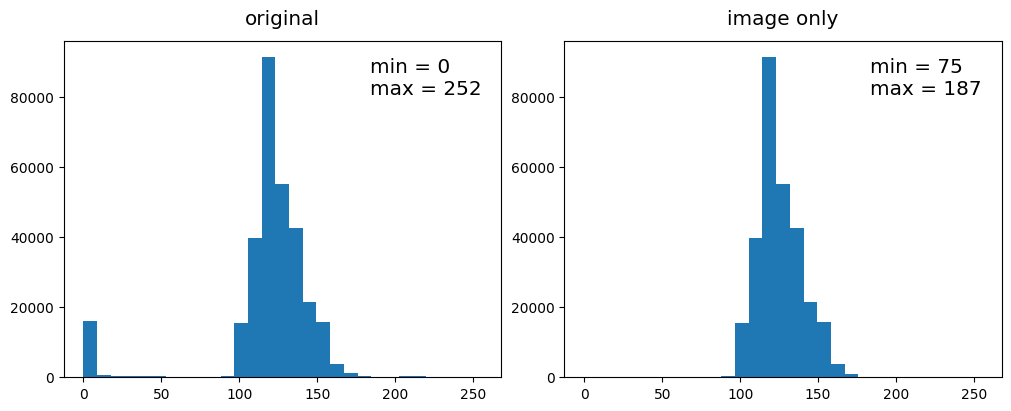

In [82]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 4), constrained_layout=True,
                       sharex=True)

for ax, im, title in zip(axs, [img_, img], ["original", "image only"]):
    ax.hist(im.flatten(), bins=np.linspace(0, 255, 30))
    ax.text(0.7, 0.95, f"min = {im.min()}\nmax = {im.max()}", va="top",
           fontsize="x-large", transform=ax.transAxes)
    ax.set_title(title, fontsize="x-large", pad=12)

fig.savefig("118_autocontrast_9.png")

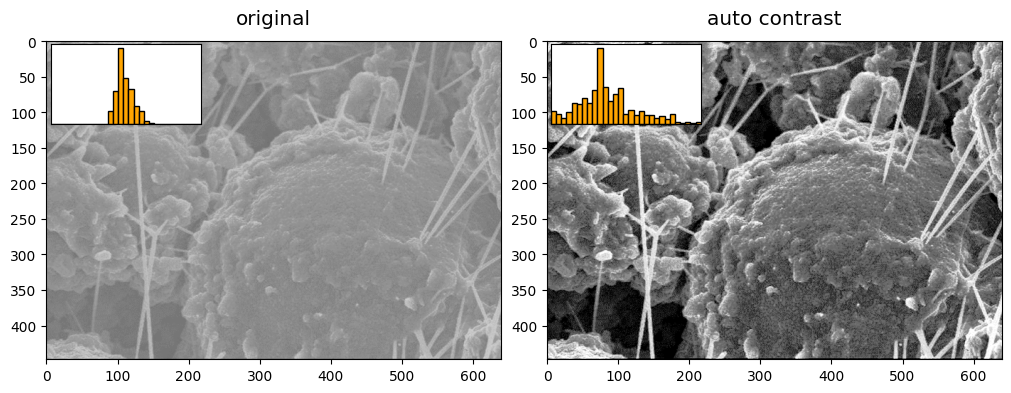

In [83]:
from skimage import exposure

v_min, v_max = np.percentile(img, (0.2, 99.8))
img_ac = exposure.rescale_intensity(img, in_range=(v_min, v_max), out_range=(0, 255)).astype(np.uint8)

fig, axs = plt.subplots(ncols=2, figsize=(10, 4), constrained_layout=True)

for ax, im, title in zip(axs, [img, img_ac], ["original", "auto contrast"]):
    ax.imshow(im, cmap="Greys_r", vmin=0, vmax=255)
    x_pos = 0.045
    if ax == axs[1]:
        x_pos += 0.5
    ax_inset = fig.add_axes([x_pos, 0.69, 0.15, 0.2])
    ax_inset.hist(im.flatten(), fc="orange", ec="k", bins=np.linspace(0, 255, 30))
    ax_inset.set(xlim=(0, 255), yticks=[], xticks=[])
    ax.set_title(title, fontsize="x-large", pad=12)

fig.savefig("118_autocontrast_11.png")

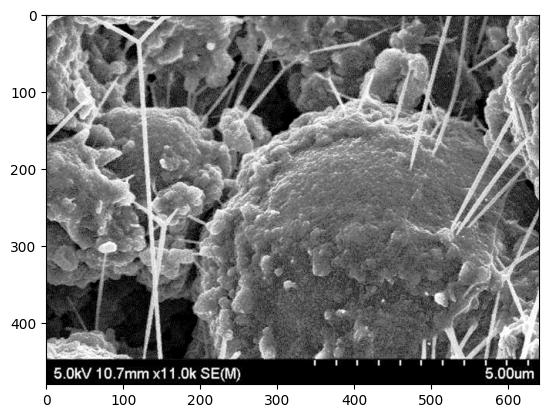

In [88]:
from skimage.io import imsave

img_merge = np.vstack((img_ac, desc))
imsave("img_autocontrast.png", img_merge)

plt.imshow(img_merge, cmap="Greys_r")
plt.savefig("118_autocontrast_12.png")

In [89]:
infilename = "sample_annot.png"

# read image
img_ = imread(infilename)

# image split: img + desc
imgfrac = 14/15
img = img_[:int(h*imgfrac), :]
desc = img_[int(h*imgfrac):, :]

# remove salt and pepper noise
v_min, v_max = np.percentile(img, (0.2, 99.8))

# apply auto contrast
img_ac = exposure.rescale_intensity(img, in_range=(v_min, v_max), out_range=(0, 255)).astype(np.uint8)

# merge images
img_merge = np.vstack((img_ac, desc))

# save file
imsave("annot_autocontrast.png", img_merge)

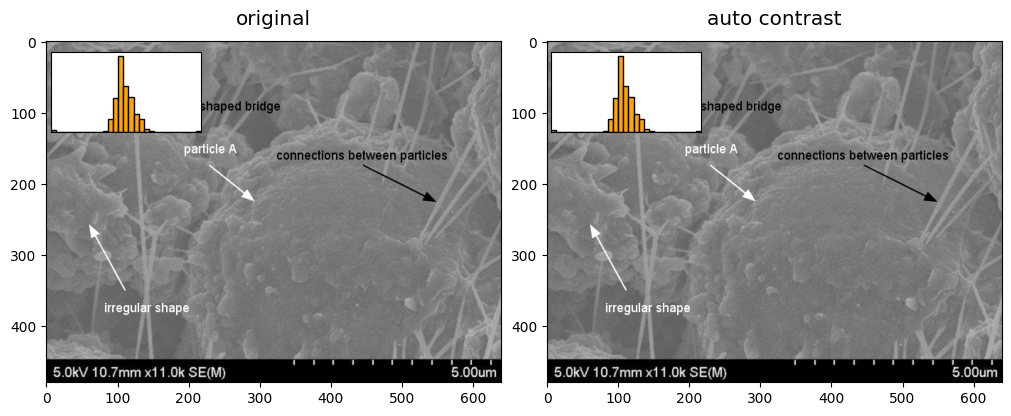

In [92]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 4), constrained_layout=True)

for ax, im, title in zip(axs, [img_, img_merge], ["original", "auto contrast"]):
    ax.imshow(im, cmap="Greys_r", vmin=0, vmax=255)
    x_pos = 0.045
    if ax == axs[1]:
        x_pos += 0.5
    ax_inset = fig.add_axes([x_pos, 0.69, 0.15, 0.2])
    ax_inset.hist(im[:int(h*imgfrac), :].flatten(), fc="orange", ec="k", bins=np.linspace(0, 255, 30))
    ax_inset.set(xlim=(0, 255), yticks=[], xticks=[])
    ax.set_title(title, fontsize="x-large", pad=12)

fig.savefig("118_autocontrast_12.png")